In [1]:
import pandas as pd
import numpy as np
import acquire

import matplotlib.pyplot as plt
import seaborn as sns

# TimeSeries Data Prep Exercise

## Notes: The end result of this exercise should be a file named prepare.py.
Using your store items data:

## Store df

In [2]:
#load my csv
df = pd.read_csv('ts_superstore.csv', index_col=0)

In [3]:
df.shape

(913000, 16)

### 1. Convert date column to datetime format.

In [4]:
df.sale_date

0         Tue, 01 Jan 2013 00:00:00 GMT
1         Wed, 02 Jan 2013 00:00:00 GMT
2         Thu, 03 Jan 2013 00:00:00 GMT
3         Fri, 04 Jan 2013 00:00:00 GMT
4         Sat, 05 Jan 2013 00:00:00 GMT
                      ...              
912995    Wed, 27 Dec 2017 00:00:00 GMT
912996    Thu, 28 Dec 2017 00:00:00 GMT
912997    Fri, 29 Dec 2017 00:00:00 GMT
912998    Sat, 30 Dec 2017 00:00:00 GMT
912999    Sun, 31 Dec 2017 00:00:00 GMT
Name: sale_date, Length: 913000, dtype: object

In [5]:
df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')

In [6]:
df.sale_date

0         Tue, 01 Jan 2013
1         Wed, 02 Jan 2013
2         Thu, 03 Jan 2013
3         Fri, 04 Jan 2013
4         Sat, 05 Jan 2013
                ...       
912995    Wed, 27 Dec 2017
912996    Thu, 28 Dec 2017
912997    Fri, 29 Dec 2017
912998    Sat, 30 Dec 2017
912999    Sun, 31 Dec 2017
Name: sale_date, Length: 913000, dtype: object

In [7]:
df.sale_date = pd.to_datetime(df.sale_date, format = '%a, %d %b %Y')

In [8]:
df.sale_date

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

### 2. Plot the distribution of sale_amount and item_price.

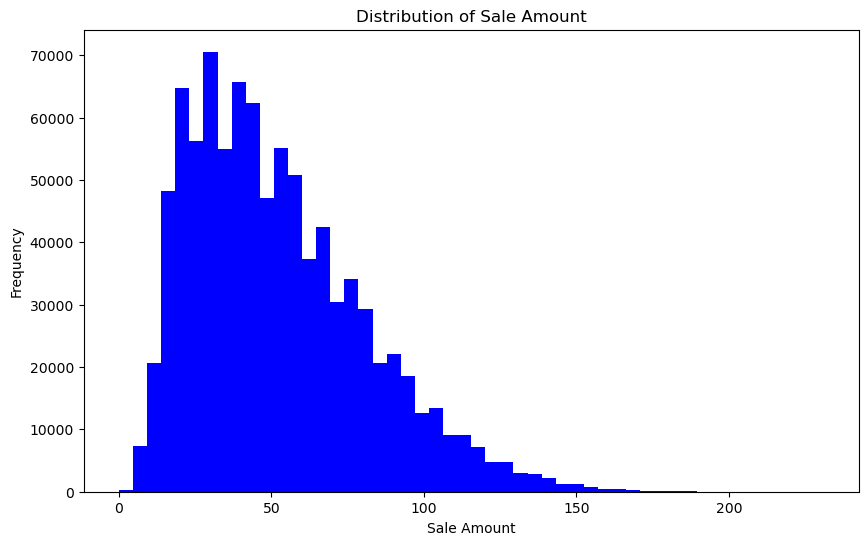

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['sale_amount'], bins=50, color='blue')
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Amount')
plt.show()

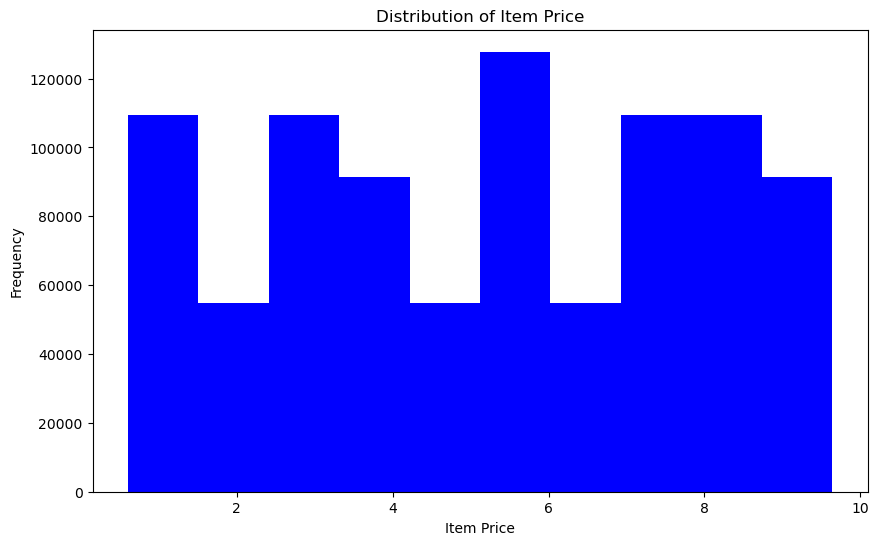

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['item_price'], color='blue')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.title('Distribution of Item Price')
plt.show()

### 3. Set the index to be the datetime variable.

In [11]:
df = df.set_index('sale_date')

In [12]:
df.head(2)

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-02,1,11.0,2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


### 4. Add a 'month' and 'day of week' column to your dataframe.


In [13]:
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-02,1,11.0,2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-03,1,14.0,3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-04,1,13.0,4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-05,1,10.0,5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [15]:
# this didn't work because we made it the index first
# Add 'month' column
'''
df['month'] = df['sale_date'].dt.month

# Add 'day of week' column
df['day_of_week'] = df['sale_date'].dt.dayofweek
'''

"\ndf['month'] = df['sale_date'].dt.month\n\n# Add 'day of week' column\ndf['day_of_week'] = df['sale_date'].dt.dayofweek\n"

In [16]:
# add month calling on the index using DatetimeIndex
df['month'] = pd.DatetimeIndex(df.index).month

In [17]:
# add day of the week calling on the index using DatetimeIndex
# Monday=0, and Sunday=6.
df['day_of_week'] = pd.DatetimeIndex(df.index).dayofweek

In [18]:
df.sample(1)

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,,,
2014-08-03,2,84.0,20666,2,Caress,2,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925,9255 FM 471 West,San Antonio,2,TX,78251,8,6


### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [19]:
df['sales_total'] = df['sale_amount']*df['item_price']

In [20]:
df.sample(1)

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2017-03-12,33,116.0,589504,3,The First Years,33,Tomy The First Years Gumdrop Orthodontic Pacif...,6.52,71463060078,71463060078,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,3,6,756.32


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [21]:
def prep_store(df):
    '''
    this function will prep the store df by:
    dropping time from sale_date
    converting sale date to datetime format
    setting sale_date to index
    adding a montha nd dayof week column
    Add a column, sales_total, which is a derived from sale_amount (total items) and item_price
    '''
    df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')
    df.sale_date = pd.to_datetime(df.sale_date, format = '%a, %d %b %Y')
    df = df.set_index('sale_date')
    # add month calling on the index using DatetimeIndex
    df['month'] = pd.DatetimeIndex(df.index).month
    # add day of the week calling on the index using DatetimeIndex
    # Monday=0, and Sunday=6.
    df['day_of_week'] = pd.DatetimeIndex(df.index).dayofweek
    # add column for sales_total
    df['sales_total'] = df['sale_amount']*df['item_price']
    return df

In [22]:
#test function
df = pd.read_csv('ts_superstore.csv', index_col=0)
prep_store(df)
df.sample(1)

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
480020,13,107.0,2017-05-28,229859,6,Garnier Nutritioniste,13,Garnier Nutritioniste Moisture Rescue Fresh Cl...,6.47,603084234561,603084234561,1015 S WW White Rd,San Antonio,6,TX,78220


## OPS df

### Notes: Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [24]:
df = acquire.acquire_opsd_data()
df.head(1)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN


### 1. Convert date column to datetime format.

In [26]:
df.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4383 entries, 0 to 4382
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
4383 non-null   object
dtypes: object(1)
memory usage: 34.4+ KB


In [30]:
# Convert date column to datetime format
df.Date = pd.to_datetime(df.Date)

In [31]:
df.head(1)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN


### 2. Plot the distribution of each of your variables.

Date


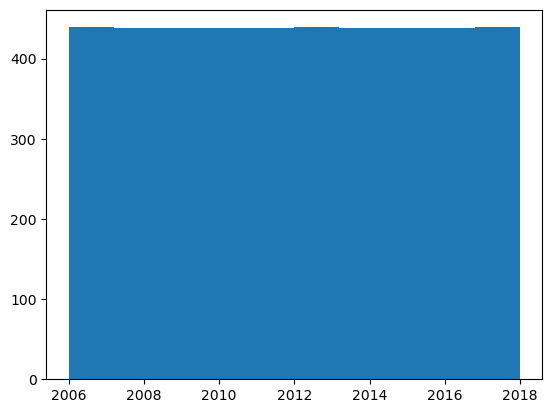

Consumption


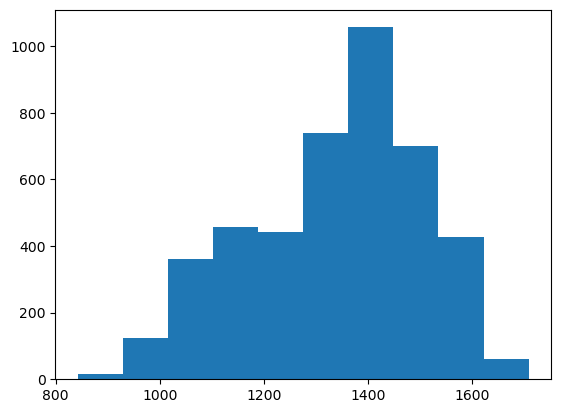

Wind


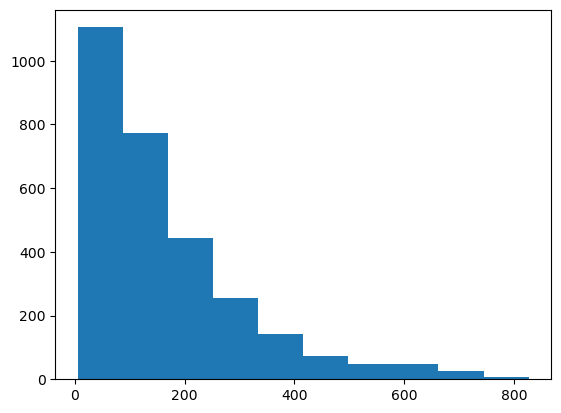

Solar


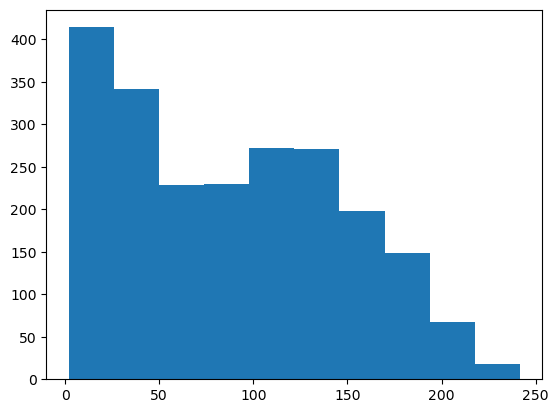

Wind+Solar


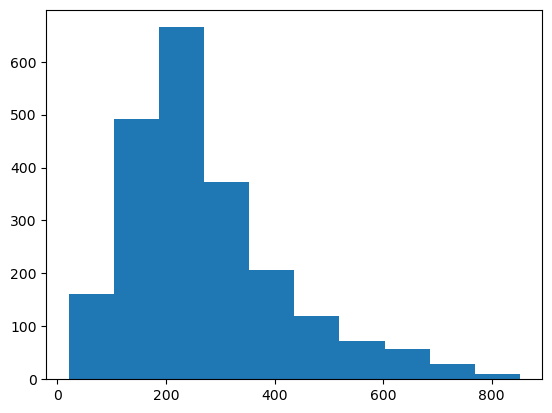

In [32]:
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.show()

### 3. Set the index to be the datetime variable.

In [33]:
# Set the index to be Date
df = df.set_index('Date')

### 4. Add a month and a year column to your dataframe.

In [37]:
# add month calling on the index using DatetimeIndex
df['month'] = pd.DatetimeIndex(df.index).month
# add year calling on the index using DatetimeIndex
df['year'] = pd.DatetimeIndex(df.index).year
df.sample(10)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2012-08-21,1367.36800,20.659,127.859,148.518,8,2012
2015-08-09,1071.30900,70.336,171.801,242.137,8,2015
2008-02-09,1293.02700,NaN,NaN,NaN,2,2008
2006-01-12,1553.28000,NaN,NaN,NaN,1,2006
2008-04-03,1491.99300,NaN,NaN,NaN,4,2008
2006-02-04,1366.32200,NaN,NaN,NaN,2,2006
2010-05-08,1143.80600,9.702,NaN,NaN,5,2010
2017-11-14,1577.45348,294.483,38.772,333.255,11,2017
2008-05-25,1050.94700,NaN,NaN,NaN,5,2008


### 5. Fill any missing values.

In [35]:
df.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [36]:
df.isna().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [40]:
df = df.fillna(0)
df.head(2)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006


In [41]:
df.isna().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64

### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [57]:
def prep_opsd_data(df):
    ''' 
    This function prepares the opsd df by:
    converting date to datetimeformat and making it the index
    adds colums for month, year
    fill nulls with '0'
    '''
    # Convert date column to datetime format
    df.Date = pd.to_datetime(df.Date)
    # Set the index to be Date
    df = df.set_index('Date')
    # add month calling on the index using DatetimeIndex
    df['month'] = pd.DatetimeIndex(df.index).month
    # add year calling on the index using DatetimeIndex
    df['year'] = pd.DatetimeIndex(df.index).year
    # fill missing values with '0'
    df = df.fillna(0)
    return df

In [55]:
# test function
df = acquire.acquire_opsd_data()

In [56]:
df=prep_opsd_data(df)
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006
